# 计算物理期末总结
## $\S0$ 选择填空
### $\S0.0$ Error
#### $\S0.0.0$ the Classes of Error
1. Model error
2. Measurement error
3. **Truncation error**

连续过程离散化的误差，比如差分迭代公式。

4. Round-off error

计算机的浮点数截断（这个不叫truncation error真心抽象）。此外 Round off在低精度下远小于 Truncation error，一般不予考虑。
#### $\S0.0.1$ 误差计算
##### $\S0.0.1.0$ 误差定义，误差限。
* Error

$$
Error=Z_{real}-Z_{measure}
$$

* Absolute error

$\quad\quad$ Because $Z_{real}$ always cound not be precisely known, so we can only give a approximate range of Error:

$$
|Error|\leq\varepsilon
$$

$\quad\quad\varepsilon$ is absolute error, so we usually express $Z_{real}$ as:

$$
E_{real}=Error+Z_{measure}\in Z_{measure}\pm\varepsilon
$$

* Relative error

$$
\varepsilon_r=\frac{\varepsilon}{|Z_{real}|}\approx\frac{\varepsilon}{|Z_{measure}|}
$$

* Instance 

事实上，她应该只会考绝对误差到相对误差的换算：

假设我们有一个 round off 舍入的浮点数 3.1415626, 我们不知道此舍入的误差是多少，但由于round off 方法，最大误差限：
$$
\epsilon =0.00000005
$$
则相对误差：
$$
\epsilon_r=\frac{|\epsilon|}{|3.1415626|}
$$
##### $\S0.0.1.1$ The compute of truncation error
* 传统有限差分法误差形式（单变量，常微分）
0. **The relation of local and overall**

$\partial_x y>0$,则$OTE>\sum_i(LTE)_i$
1. Local Truncation Error

assume $u(t_i)$ is analytical solution,$y(t_i)$ is numerical solution.

we employ truncation route to secure $y(t_{i+1})$
$$
LTE=y(t_{i+1})-u(t_{i+1})
$$

Viz. , LTE=analytical solution- numerical solution

2. Overall Truncation Error

Evidently if we only konw $u(t_0)$, then we secure numerical solution: $y(t_n)$
$$
OTE=y(t_{n})-u(t_{n})
$$


2. 误差的量级估计

Assume the length of step is $h$

$$
\begin{cases}
LTE=O(h^{p+1})\\
OTE=O(h^{p})
\end{cases}
$$

其中p为方程阶数（微分方程的个数）。

* 偏微分显式差分法误差形式

LTE一般和稳定条件阶数相同。

### $\S0.1$ Python Foundation
#### $\S0.1.0$ 导入文件模式分类

```python
inuputfile=open("鸡你太美.txt",'w') #input #the mode to write
```

The core point is the modes:
* 'r': read
* 'w': write
* 'a': append
* 'b': bin
* '+': read/write

#### $\S0.1.1$ matplotlib.pyplot

没什么，单纯我记不住这个库名字。

### $\S0.2$ 分形图形
#### $\S0.2.0$ Instance
0. julia 集：**$Z_{n+1}=Z_{nm}+C_0$**
1. 混沌吸引子轨道
#### $\S0.2.1$ Properties
0. **Self-similarity**
1. Fractional Dimension

...
#### $\S0.2.2$ Fractional Dimension Compute（豪斯道夫维数）

每个维度长增加两倍，体积增加量为 $2^{dim}$；例如Sierpinski, 维度长增加两倍，体积增加三倍，其维度为：
$$
dim=log_23
$$

### $\S0.3$ 插值拟合
#### $\S0.3.0$ 插值分类
0. 多项式拟合插值
主要是拉格朗日插值（可以设置完全符合已知点）。缺点多个点拟合需要高阶多项式，会有过拟合现象。若分段使用拉格朗日插值又会有拟合函数不光滑（非完全拟合甚至不连续）的缺陷。
1. 分段样条插值
采用构造过某个点（包括导数也可过定点）的低阶多项式。例如三次样插值值可以做到一阶导数光滑，二阶导数连续。
#### $\S0.3.1$ 拟合目标

可以使用最小二乘法，选择合适的参数，使LTE的平方和最小：
$$
\min \sum_i LTE^2
$$

### $\S0.4$ 数值积分
#### $\S0.4.0$ 积分公式分类
0. 矩形公式
1. 梯形公式
2. **辛普森1/3公式**

辛普森1/3公式适用于将积分区间分成偶数个小区间（一次计算两个子区间）。假设我们需要计算函数 $f(x)$ 在区间 $[a, b]$ 上的定积分，可以将该区间分成 $ n $ 个等长小区间，其中 $ n $ 是偶数。

公式如下：
```python
x = np.linspace(a, b, n+1) # 点数要是奇数
y = f(x)
V = 0
for i in range(1, n, 2):
    V += (1/3) * (y[i-1] + 4*y[i] + y[i+1]) * h
```
其中，$ h = \frac{b-a}{n} $ 是每个小区间的长度。这种形式有点呆，但他考。注意循环范围（1,n,2），但是我们有n+1个端点。

In [44]:
import numpy as np

# 定义
## 定义函数
def f(x):
    return np.sin(x)
## 定义变量
a = 0
b = np.pi
n = 6 #分成6个小区间
h = (b - a) / n
### x和y的取值
x = np.linspace(a, b, n+1) #端点比区间多一个。
y = f(x)

# 应用辛普森1/3公式形式计算
V = 0
for i in range(1, n, 2):
    V += (1/3) * (y[i-1] + 4*y[i] + y[i+1]) * h
print(f'Approximate integral: {V}')


Approximate integral: 2.0008631896735363


#### $\S0.4.1$ Truncation error for simps

这里的p应该取4，Viz., $LTE=O(h^5), OTE=O(h^4)$

### $\S0.5$ 求方程零点
#### $\S0.5.0$ 方法分类
1. 二分法

优点是异号端点区间一定可以找到一个零点的大致位置

缺点是收敛慢

2. 牛顿切线法
3. 弦割法

这俩优点是收敛快，缺点是可能收飞。

#### $\S0.5.1$ General employment route.

先用二分法找到零点大致区间，然后用牛顿或弦割收敛。

### $\S0.6$ FFT

#### $\S0.6.0$ 采样点频率要求：

* 采样频率：原信号离散化程度，即一秒钟取多少个点。

* 采样定理：**实际保证采样频率为信号最高频率(要经验判断)的2.56～4倍**；当然按它的定理要求 **2** 倍，但是鬼知道原信号频率是多少。

### $\S0.7$ 常微分方程
公共变量为t，我们可以发现，这套方法等于在对时间求积分。
#### $\S 0.7.0$ 差分方法
假设u(t)是未知解析表达式，f(t)是已知的u(t)的一阶导函数，y(t)是数值解的表达式,h为时间步长。
$$
\frac{du(t)}{dt}=f(t,u(t))
$$
0. 欧拉法

后续差分方法均为改进平均斜率。
* primal 
$$
y(t_{i+1})=y(t_{i})+h*f(t_{i},y(t_{i}))
$$
* enhanced
$$
y(t_{i+1})=y(t_{i})+\frac{h}{2}[f(t_{i},y(t_{i}))+f(t_{i+1},y(t_{i+1}))]
$$
可以发现，鬼知道 $,y(t_{i+1})$ 是多少，所以这个值是用primal算的。
1. **Fourth order Runge-Kutta method**
$$
y{t_{i+1}}=y(t_{i})+\frac{h}{6}(k_0+2k_1+2k_2+k_3)
$$
其中，所用斜率为：
$$
\begin{cases}
k_0=f(t_i,y(t_i))\\
k_1=f(t_i+\frac{h}{2},y(t_i)+k_0\frac{h}{2})\\
k_2=f(t_i+\frac{h}{2},y(t_i)+k_1\frac{h}{2})\\
k_3=f(t_i+h,y(t_i)+k_2h)
\end{cases}
$$
时间步长是：1,1/2,1/2,1，权重是1,2,2,1。有点对称，但不多。

#### $\S 0.7.1$ 误差分析
* primal 欧拉法: p=1
* enhanced 欧拉法: p=2
* Fourth order Runge kutta method: p=4
* **变步长Runge kutta method**： 其实就是选择满足精度要求 $\varepsilon$ 的最大步长。看它的样子是用LTE。

### $\S 0.8$ 混沌系统

#### $\S 0.8.0$ 基本特征
1. 对初始条件敏感
2. 奇异吸引子
3. 在不同标度下有分形结构：倍周期分岔
 
#### $\S 0.8.1$ 不动点分类

##### $\S 0.8.1.0$ Introduction
又称奇点，指 $\frac{dy}{dt}=0$ 和 $\frac{dx}{dt}=0$ 的时候,相点不动（这不是废话吗）。

微扰 $\delta x,\delta y...$ 的解一般是 **$e^{\lambda,t}$ 的线性叠加**,记作 **$e^{\mu+i\sigma}$**，显然：
1. $\sigma=0$ 微扰单调扩大或减小
2. $\mu=0$ 运动 $Ci\sin\theta$ 震荡
3. 一般情况，啥都有。
##### $\S 0.8.1.1$ Overall Classes

$\mu=0$ 即震荡的情况是微扰是稳定的（其实显然微扰减小更好），叫 **椭圆不动点** ；其余都是 **双曲不动点**

##### $\S 0.8.1.2$ Local 

这明明是针对特定方程才成立，而且书上大概写错了。她考的话很神经。

$\Delta=\gamma^2-4c$ ，微扰解有两项 $C_1e^{\lambda_1 t}+C_2 e^{\lambda_2 t}$

0. $\Delta\ge 0$ 这显然 $\lambda$ 为实数，微扰单纯大小变化。
* 稳定**结点**，根都大于0
* 不稳定节点，根都小于0
* **鞍点** ,一大一小。她说有一个“方向稳定”，其实应该是特征方向，不是空间自由度。

1. $\Delta< 0$ 两个解为 $\lambda_{1,2}=-\gamma/2 \pm i\sqrt{-\Delta}/2$，但不动点还是关注实部，即:
* 稳定**焦点** $-\gamma<0$ 
* 不稳定**焦点** $-\gamma>0$
* **中心点** ：$-\gamma=0$


#### $\S 0.8.2$ 混沌吸引子特征
只有耗散系统中的混沌才会产生奇异吸引子。

* **稳定性：抗初值干扰能力（指的是局限的相空间区域）。**
* **对初值敏感（bushi）：指的是轨道不稳定。**
* **低维性：相空间自由度低，但轨道无限嵌套，自相似性。**
* **非周期性：轨道不相交**

#### $\S 0.8.3$ 洛伦茨方程与奇怪吸引子

判断条件：$r>r_c\approx 24.74$,C₁,C₂ 成为了鞍-焦点，系统出现了复杂的分岔序列


### $\S 0.9$ 偏微分方程
#### $\S 0.9.0$ 分类
0. 椭圆型 $-\nabla^2 \varphi=S$
1. 抛物型 $[\partial_t-\lambda\nabla^2]\varphi=S$
2. 双曲型 $[\partial_t^2-\lambda\nabla^2]\varphi=S$

#### $\S 0.9.1$ 初始条件和边界条件要求
* 边界条件

和具体什么方法无关，都需要。和空间自由度有关，一个dim两个边界条件。

**分类就是1,2,3类边界条件**，注意导数他叫**法向导数**。

* 初始条件
  
抛物要一个，双曲要两个。

#### $\S 0.9.1$ 稳定条件
* 拉普拉斯
0. 显式
$$
r=\frac{h_y^2}{h_x^2}\in(0,1)
$$
1. 隐式

恒稳定。
* 热传导
$$
r=\frac{\tau}{h^2}\lambda\in(0,\frac{1}{2})
$$
* 弦振动
$$
r=\frac{\tau^2}{h^2}\lambda\in(0,1)
$$
#### $\S 0.9.2$ 截断误差

和r中步长的阶数相同，LET注意不同于常规常微分判断。

#### $\S 0.9.3$ 松弛法
对于椭圆形偏微分方程，如果在差分公式中，随时将上一步 算得的各点的新值替代旧值，并且每次计算新值也替换成新值与旧值的“组合”, 则得到下列松弛法的计算公式，**其中0<ω<2。当 ω<1 称为“低松弛”,ω>1称为“超松弛”。**

### $\S 0.10$ MC Method

#### $\S 0.10.0$ The concept of math
* 正态分布

$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

* Weak Law of Large Numbers, WLLN

设 $X_1, X_2, \ldots, X_n$ 是一列 **独立同分布** 的随机变量，每个随机变量的期望值为 $\mathbb{E}[X_i] = \mu$，那么对于任意的正数 $\epsilon > 0$，有：
$$
\lim_{n \to \infty} \Pr\left(\left|\frac{1}{n} \sum_{i=1}^n X_i - \mu\right| \ge \epsilon \right) = 0
$$

* Central Limit Theorem,CLT

设 $X_1, X_2, \ldots, X_n$ 是一列**独立同分布**的随机变量。$\mathbb{E}[X_i]=\mu,\mathbb{D}(X_i)=\sigma^2$

$$
\overline{X}_n = \frac{1}{n} \sum_{i=1}^n X_i \xrightarrow{d} \mathcal{N}(\mu, \frac{\sigma^2}{n})
$$

其中 $\xrightarrow{d}$ 代表收敛于分布。

#### $\S 0.10.1$ 生成随机数的方法

0. 线性同余
1. 反函数
2. 舍选法

均为对0-1伪随机数组进行变换。

#### $\S 0.10.2$ 定积分计算方法
#### $\S 0.10.2.0$ 投点法
#### $\S 0.10.2.1$ 平均类计算
##### $\S 0.10.2.1.0$ Input:平均值估计
* 概率分布为p(x),f(x)理论期望求法。
$$
\langle f(x)\rangle_x=\int_a^b f(x)p(x) dx
$$
* 如果是用采样集估计平均值，那我们只要保证采样集的概率分布也是 $p(x)$（从数据库均匀采样），那么直接对采样点算术平均即可，因为 $p(x)$ 已经包含在 $f(x_i)$ 频数分布/N。
$$
\langle f(x)\rangle_x\approx\frac{1}{N}\sum_{i=1}^N f(x_i) 
$$
你应该发现其优势了，只要可以模拟采样，不需要只要 $p(x)$ 形式即可计算平均。
* 如果做MC,那产生随机数分布要按照 $p(x)$， 然后对采样点求算术平均即可。

就是说我们不想按数据库按照 $p(x)$ 均匀采样。
$$
\langle f(x)\rangle_x=\int_a^b f(x)p(x) dx=\int_a^b \pi(x) \frac{p(x)}{\pi(x)} f(x) dx
$$

然后按 $\pi(x)$ 采样,显然要用权重弥补以下。
$$
\langle f(x)\rangle_x\approx\frac{1}{N}\sum_{i=1}^N \frac{p(x_i)}{\pi(x_i)} f(x_i)
$$

##### $\S 0.10.2.1.1$ 平均值法

平均值乘区间长度

##### $\S 0.10.2.1.2$ 重要性抽样

平均值乘区间长度

## $\S 1.0$ 大题

### $\S 1.0.0$ 平均值法积分
这个天才有np库不用，这是很抽象的。
```python
random.seed(None)
np.random.uniform(0,xm,size=(N,))
```

In [45]:
# -*- coding: utf-8 -*-
import numpy as np
import random
N = 1000000 #积分
xm = 50.0
random.seed(None)
A = []

#----------------------------------
## 随机参数
kesi = np.random.uniform(0,xm,size=(N,))
## 表达式计算
A=kesi**(7/3)*np.exp(-kesi)
## 求和
integral = xm/N*np.sum(A)
#-----------------------------------

print(integral)

2.790748852949794


### $\S 1.0.1$ 拉格朗日插值
这天才又用循环列表，抽象plus
```python
from scipy import interpolate
data=np.loadtxt('calibrate.dat')

#调用 scipy 程序库中的 interpolate 模块
poly = interpolate.lagrange(signal_alpha_source, energy_alpha_source) # from scipy
#调用函数 poly，计算出拉格朗日插值函数在(1300，1800)区间的数值。
signal=np.arange(1300,1800,1)
energy=poly(signal)
```

enegy of particle:5563.485keV


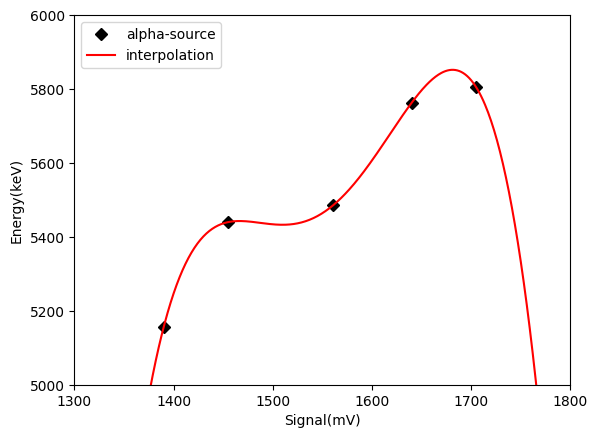

In [46]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pylab as pl
from scipy import interpolate

#读取数据'calibrate.dat'
#data=np.loadtxt('calibrate.dat')
energy_alpha_source=[5156,5440,5486,5763,5805]#data[:,0]
signal_alpha_source=[1390,1455,1561,1640,1705]#data[:,1]

#---------------------------------------------------------
#调用 scipy 程序库中的 interpolate 模块
poly = interpolate.lagrange(signal_alpha_source, energy_alpha_source) # from scipy
#调用函数 poly，计算出拉格朗日插值函数在(1300，1800)区间的数值。
signal=np.arange(1300,1800,1)
energy=poly(signal)
#----------------------------------------------------------

#调用函数poly，计算出信号幅度为1588mV的待测粒子能量。
print('enegy of particle:%8.3fkeV'%poly(1588))

# 将结果用图形表现出来   
pl.plot(signal_alpha_source,energy_alpha_source,'kD',label='alpha-source')
pl.plot(signal,energy,'r-',label='interpolation')
pl.xlabel('Signal(mV)')
pl.ylabel('Energy(keV)')
pl.xlim(1300,1800)
pl.ylim(5000,6000)
pl.legend(loc='upper left')
pl.show()



### $\S 1.0.2$ 热传导

注意理论：此为抛物型偏微分方差，需要一个初始条件。由于是一维两个boundary conditions 即可。

稳定条件是 $\lambda\frac{\tau}{h^2}<0.5$

这里初始条件为 $0.1*x*(10.0-x)$ ,边界条件为0。

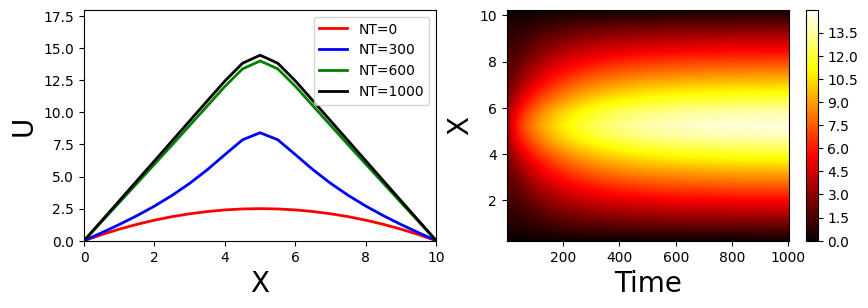

In [54]:
# -*- coding: utf-8 -*-
import numpy as np
import pylab as pl
tau = 0.05 #时间步长
h = 0.5 #空间步长
lamda = 1.
A = lamda*tau/h**2
l = 10. #杆长
#-----------------------------------------------------
NX = int(l/h) #空间节点数
NT = 1000 #时间步数
#------------------------------------------------------
U = np.zeros([NX+1,NT+1])  #温度 # 她都多定义了一个步长。
x = np.arange(0,(NX+1)*h,h) #坐标  #注意这里x到 NX*h
## 这里原先边界条件只有安慰作用；
## 初始条件
U[:,0]=0.1*x*(10.0-x)
## 迭代公式
for k in range(NT):
    for i in range(1,NX):  #左右两个端点没有动，符合boundary
        U[i,k+1]=A*U[i+1,k]+(1-2*A)*U[i,k]+A*U[i-1,k] + \
                 tau*5.0*np.exp(-2.0*(i*h-5.0)**2)
#----------------------------------------------------------
fig = pl.figure(figsize=(10,3))
ax1 =fig.add_subplot(1,2,1)
ax2 =fig.add_subplot(1,2,2)

ax1.plot(x,U[:,0], 'r-', label='NT=0',linewidth=2.0)
ax1.plot(x,U[:,100], 'b-', label='NT=300',linewidth=2.0)
ax1.plot(x,U[:,600], 'g-', label='NT=600',linewidth=2.0)
ax1.plot(x,U[:,1000], 'k-', label='NT=1000',linewidth=2.0)
ax1.set_ylabel(r'U', fontsize=20)
ax1.set_xlabel(r'X', fontsize=20)
ax1.set_xlim(0,10)
ax1.set_ylim(0,18)
ax1.legend(loc='upper right')

extent = [0,NT+1,0,(NX+1)*h]
levels = np.arange(0.0,15.0,0.01)
cs = ax2.contourf(U,levels,origin='lower',extent=extent,cmap=pl.cm.hot)
cbar = fig.colorbar(cs)
ax2.set_ylabel(r'X', fontsize=20)
ax2.set_xlabel(r'Time', fontsize=20)
pl.show()


### $\S 1.0.3$ 求pi面积 

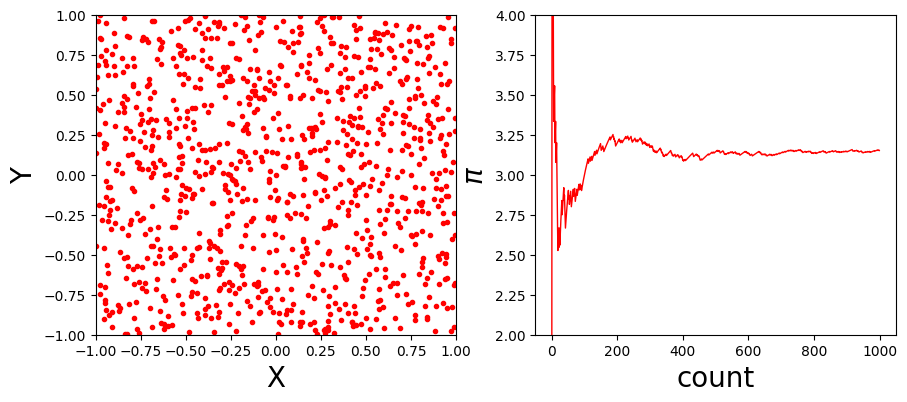

In [67]:
# -*- coding: utf-8 -*-
import numpy as np
import pylab as pl
import random

n = 1000  # 飞镖数
r0 = 1.0  #圆半径
seed = 135971 #随机数种子
xr = np.zeros(n)
yr = np.zeros(n)
pi = np.zeros(n)
count = np.zeros(n)
random.seed(seed)  #设定随机数种子
m = 0 #圆内飞镖数

#--------------------------------------------------
for i in range(1,n):
    xr[i] = random.uniform(-1,1) #飞镖位置
    yr[i] = random.uniform(-1,1)
    r2 = xr[i]**2 + yr[i]**2 #飞镖距离圆心距离平方
    if(r2 < r0**2):  #是否落入圆内
       m = m + 1
    pi[i] = 4.0*m/i  #投i个飞镖后估算出的pi值
    count[i] = i
#----------------------------------------------

fig = pl.figure(figsize=(10,4))
ax1 =fig.add_subplot(1,2,1)
ax2 =fig.add_subplot(1,2,2)
ax1.plot(xr, yr, 'r.')
ax2.plot(count,pi, 'r-',linewidth=1.0)
ax1.set_ylabel(r'Y', fontsize=20)
ax1.set_xlabel(r'X', fontsize=20)
ax1.set_xlim(-1,1)
ax1.set_ylim(-1,1)
ax2.set_ylim(2,4)
ax2.set_ylabel(r'$\pi$', fontsize=20)
ax2.set_xlabel(r'count', fontsize=20)
pl.subplots_adjust(left=0.15,bottom=0.1,top=0.9,right=0.95, \
                   hspace=0.25,wspace=0.22)
pl.show()

### $\S 1.0.4$ 单摆混沌系统。

$$
\begin{cases}
\frac{dw}{dt}=-\frac{g}{l}\sin\theta-qw+F\sin(wt)\\
w=\frac{d\theta}{dt}
\end{cases}
$$

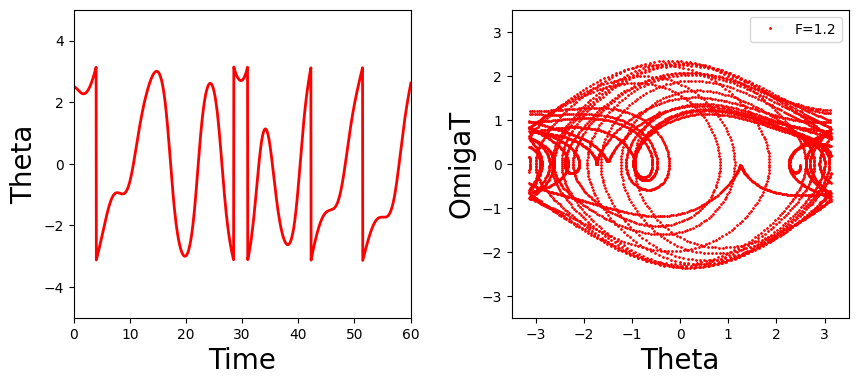

In [77]:
# -*- coding: utf-8 -*-
import numpy as np
import pylab as pl

# peremeter 
## constant
g=9.8
xl=9.8
q = 0.5
F=1.2
W=2.0/3.0
twopi = 2*np.pi
## step strength
dt=0.04

#-----------------------------------------------------
## 初值
theta=2.5
omiga=0.
n = 5000
t = 0.0
ThetaT0 = []
OmigaT0 = []
Time0 = []

#----------------------------------------------------
for i in range(n):
    # 迭代
    xk1=-(g/xl)*np.sin(theta)-q*omiga+F*np.sin(W*t)
    xl1=omiga
    xk2=-(g/xl)*np.sin(theta+dt/2.*xl1)-q*(omiga+dt/2.*xk1)+F*np.sin(W*(t+dt/2))
    xl2=omiga+dt/2.*xk1
    xk3=-(g/xl)*np.sin(theta+dt/2.*xl2)-q*(omiga+dt/2.*xk2)+F*np.sin(W*(t+dt/2))
    xl3=omiga+dt/2.*xk2
    xk4=-(g/xl)*np.sin(theta+dt*xl3)-q*(omiga+dt*xk3)+F*np.sin(W*(t+dt))
    xl4=omiga+dt*xk3
    omiga=omiga+dt/6.*(xk1+2*xk2+2*xk3+xk4)
    theta=theta+dt/6.*(xl1+2*xl2+2*xl3+xl4)
    # 限定范围于-pi,pi
    theta=(theta+twopi/2)%twopi-twopi/2

    t=t+dt
    ThetaT0.append(theta)
    OmigaT0.append(omiga)
    Time0.append(t)
#-------------------------------------------------------

fig = pl.figure(figsize=(10,4))
ax1 =fig.add_subplot(1,2,1)
ax2 =fig.add_subplot(1,2,2)
ax1.plot(Time0, ThetaT0, 'r-', label='F=1.2',linewidth=2.0)
ax2.plot(ThetaT0, OmigaT0, 'r.', label='F=1.2',ms=2.0)

pl.subplots_adjust(hspace=0.35,wspace=0.3)
ax1.set_ylabel(r'Theta', fontsize=20)
ax1.set_xlabel(r'Time', fontsize=20)
ax1.set_xlim(0,60)
ax1.set_ylim(-5.0,5.0)
ax2.set_xlabel(r'Theta', fontsize=20)
ax2.set_ylabel(r'OmigaT', fontsize=20)
ax2.set_xlim(-3.5,3.5)
ax2.set_ylim(-3.5,3.5)
pl.legend(loc='upper right')
pl.show()